<a href="https://colab.research.google.com/github/AlgoNeural/logistic_regression/blob/main/Logistic_regression_with_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
import numpy as np
import torch
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt

# **1-dimensional gradient descent**

###**Function:** $f(x) = x^2$

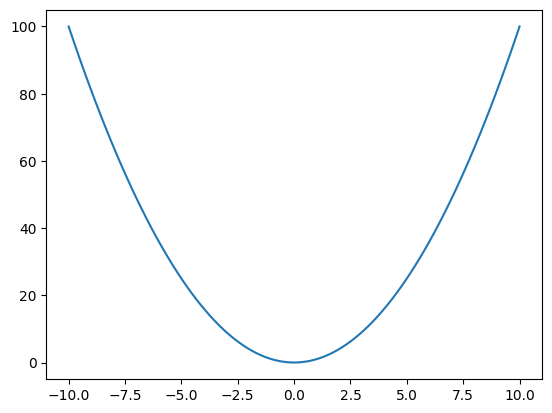

In [109]:
x_values = np.linspace(-10, 10, 100)
y_values = [x**2 for x in x_values]

plt.plot(x_values, y_values)
plt.show()

In [110]:
def f(x):
  return x**2

###**Derivative:** $\frac{df}{dx} = 2x$

In [111]:
def dfdx(x):
  return 2 * x

###**Gradient descent**

In [112]:
# Initialize
x0 = 5
lerning_rate = 0.1
n_steps = 25

# Run gradient descent
x = x0
for iter in range(n_steps):
  print(f"iter: {iter:2d}  x: {x:10.6f}  f(x): {f(x):10.6f}")
  # Find the gradient
  grad = dfdx(x)
  # Update the argument
  x = x - lerning_rate * grad

iter:  0  x:   5.000000  f(x):  25.000000
iter:  1  x:   4.000000  f(x):  16.000000
iter:  2  x:   3.200000  f(x):  10.240000
iter:  3  x:   2.560000  f(x):   6.553600
iter:  4  x:   2.048000  f(x):   4.194304
iter:  5  x:   1.638400  f(x):   2.684355
iter:  6  x:   1.310720  f(x):   1.717987
iter:  7  x:   1.048576  f(x):   1.099512
iter:  8  x:   0.838861  f(x):   0.703687
iter:  9  x:   0.671089  f(x):   0.450360
iter: 10  x:   0.536871  f(x):   0.288230
iter: 11  x:   0.429497  f(x):   0.184467
iter: 12  x:   0.343597  f(x):   0.118059
iter: 13  x:   0.274878  f(x):   0.075558
iter: 14  x:   0.219902  f(x):   0.048357
iter: 15  x:   0.175922  f(x):   0.030949
iter: 16  x:   0.140737  f(x):   0.019807
iter: 17  x:   0.112590  f(x):   0.012677
iter: 18  x:   0.090072  f(x):   0.008113
iter: 19  x:   0.072058  f(x):   0.005192
iter: 20  x:   0.057646  f(x):   0.003323
iter: 21  x:   0.046117  f(x):   0.002127
iter: 22  x:   0.036893  f(x):   0.001361
iter: 23  x:   0.029515  f(x):   0

# **Generic form**

In [113]:
def format_value(value):
    if isinstance(value, np.ndarray):
        return np.array2string(value, formatter={'float_kind': 
                                                 lambda x: f"{x:10.6f}"})
    else:
        return f"{value:10.6f}"


def grad_descent(func, derivative, x0, lerning_rate, n_steps):
  # Run gradient descent
  x = x0
  for iter in range(n_steps):
    x_str = format_value(x)
    fx_str = format_value(func(x))
    arg_str = f"x: {x_str}"
    print(f"iter: {iter:2d}  {arg_str} f(x): {fx_str}")
    # Find the gradient
    grad = derivative(x)
    # Update the argument
    x = x - lerning_rate * grad
  return x

In [114]:
# Test
x_ = grad_descent(f, dfdx, x0=-7, lerning_rate=0.1, n_steps=35)

iter:  0  x:  -7.000000 f(x):  49.000000
iter:  1  x:  -5.600000 f(x):  31.360000
iter:  2  x:  -4.480000 f(x):  20.070400
iter:  3  x:  -3.584000 f(x):  12.845056
iter:  4  x:  -2.867200 f(x):   8.220836
iter:  5  x:  -2.293760 f(x):   5.261335
iter:  6  x:  -1.835008 f(x):   3.367254
iter:  7  x:  -1.468006 f(x):   2.155043
iter:  8  x:  -1.174405 f(x):   1.379227
iter:  9  x:  -0.939524 f(x):   0.882706
iter: 10  x:  -0.751619 f(x):   0.564932
iter: 11  x:  -0.601295 f(x):   0.361556
iter: 12  x:  -0.481036 f(x):   0.231396
iter: 13  x:  -0.384829 f(x):   0.148093
iter: 14  x:  -0.307863 f(x):   0.094780
iter: 15  x:  -0.246291 f(x):   0.060659
iter: 16  x:  -0.197032 f(x):   0.038822
iter: 17  x:  -0.157626 f(x):   0.024846
iter: 18  x:  -0.126101 f(x):   0.015901
iter: 19  x:  -0.100881 f(x):   0.010177
iter: 20  x:  -0.080705 f(x):   0.006513
iter: 21  x:  -0.064564 f(x):   0.004168
iter: 22  x:  -0.051651 f(x):   0.002668
iter: 23  x:  -0.041321 f(x):   0.001707
iter: 24  x:  -0

# **Multidimensional (multivariate) gradient descent**

### **Function: $f(x) = \|x - \mathbb{1}\|^2 = \sum_{i=1}^n (x_i - 1)^2$**

In [115]:
def f_mult(x):
  return np.linalg.norm(x - 1)**2

###**Gradient:** $∇f(x) = 2(x - \mathbb{1}) = (2x_1 - 1, 2x_2 - 1, \dots, 2x_n - 1)$

In [116]:
def f_mult_grad(x):
  return 2 * (x - 1)

In [117]:
# Test
x_ = grad_descent(f_mult, f_mult_grad, x0=np.array([2, 3, 4, 2.4, -1]), lerning_rate=0.1, n_steps=35)

iter:  0  x: [  2.000000   3.000000   4.000000   2.400000  -1.000000] f(x):  19.960000
iter:  1  x: [  1.800000   2.600000   3.400000   2.120000  -0.600000] f(x):  12.774400
iter:  2  x: [  1.640000   2.280000   2.920000   1.896000  -0.280000] f(x):   8.175616
iter:  3  x: [  1.512000   2.024000   2.536000   1.716800  -0.024000] f(x):   5.232394
iter:  4  x: [  1.409600   1.819200   2.228800   1.573440   0.180800] f(x):   3.348732
iter:  5  x: [  1.327680   1.655360   1.983040   1.458752   0.344640] f(x):   2.143189
iter:  6  x: [  1.262144   1.524288   1.786432   1.367002   0.475712] f(x):   1.371641
iter:  7  x: [  1.209715   1.419430   1.629146   1.293601   0.580570] f(x):   0.877850
iter:  8  x: [  1.167772   1.335544   1.503316   1.234881   0.664456] f(x):   0.561824
iter:  9  x: [  1.134218   1.268435   1.402653   1.187905   0.731565] f(x):   0.359567
iter: 10  x: [  1.107374   1.214748   1.322123   1.150324   0.785252] f(x):   0.230123
iter: 11  x: [  1.085899   1.171799   1.257

#**Image classification**

### **Download the data**

In [118]:
# 0s vs 1s
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# Download and load the training data
train_set = torchvision.datasets.MNIST(root='./data', train=True, download=True, 
                                       transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, 
                                           shuffle=True)

# Download and load the test data
test_set = torchvision.datasets.MNIST(root='./data', train=False, download=True, 
                                      transform=transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=True)

### **Filter and normalize the data**

train_set,   test_set

In [119]:
train_images = train_set.data.numpy()
trainY = train_set.targets.numpy()[:, np.newaxis]
test_images = test_set.data.numpy()
testY = test_set.targets.numpy()[:, np.newaxis]

In [120]:
trainY.shape

(60000, 1)

In [121]:
def get_binary_images(data, labels):
  lab = np.squeeze(labels)
  idx = (lab == 0) | (lab == 1)
  return data[idx], labels[idx]

In [122]:
# Filter the data on 0 and 1
train_images, trainY = get_binary_images(train_images, trainY)

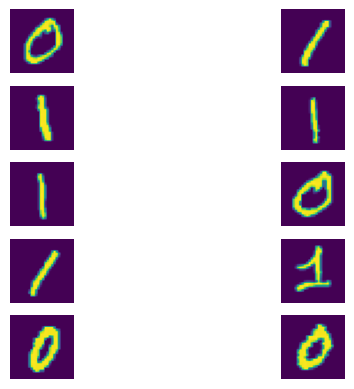

In [123]:
# Show images
N = 10
for i in range(N):
  plt.subplot(int(N/2), 2, i + 1)
  plt.imshow(train_images[i])
  plt.axis('Off')

In [124]:
train_images.shape

(12665, 28, 28)

In [125]:
train_images = np.reshape(train_images, (train_images.shape[0], -1))

In [126]:
train_images.shape

(12665, 784)

In [127]:
mean = np.mean(train_images)
std = np.std(train_images)
trainX = (train_images - mean) / std

In [128]:
test_images, testY = get_binary_images(test_images, testY)
test_images = np.reshape(test_images, (test_images.shape[0], -1))
testX = (test_images - mean) / std

# **Prediction with Logistic Regression**

### **Input: $x \in \mathbb{R}^n$**<br><br>


### **Model:**
#### &nbsp;&nbsp;&nbsp;&nbsp;**Weights:** $w \in \mathbb{R}^n$
#### &nbsp;&nbsp;&nbsp;&nbsp;**Bias:** $b \in \mathbb{R}$<br><br>

### **Output:**
#### &nbsp;&nbsp;&nbsp;&nbsp;**$Z = ⟨x, w⟩ + b = x_1 w_1 + x_2 w_2 + \dots + x_n w_n + b$**
#### &nbsp;&nbsp;&nbsp;&nbsp;**$h(Z) = p(y=1) = \frac{1}{1 + e^{-Z}}$**
#### &nbsp;&nbsp;&nbsp;&nbsp;$\text{prediction} = \begin{cases}1 ,& h(Z) \ge 0.5\\ 0 ,& \text{otherwise}\end{cases}$

### **Vectorized form**
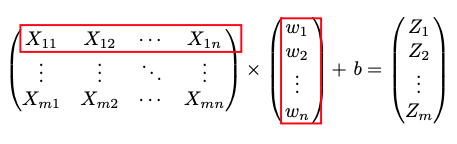



### **Bias trick**
### **$x' = (x_1, \dots, x_n, 1)$**
### **$w' = (w_1, \dots, w_n, b)$**
### **$⟨x, w⟩ + b = ⟨x', w'⟩$**
### **$x', w' \in \mathbb{R}^{n+1}$**

In [129]:
n_train = trainX.shape[0]
trainX_ = np.hstack([trainX, np.ones((n_train, 1))])

In [130]:
n_test = testX.shape[0]
testX_ = np.hstack([testX, np.ones((n_test, 1))])

### **Predictor**

In [131]:
def h(w, X):
  n_samples, n_features = X.shape
  assert w.shape == (n_features, 1)
  Z = np.dot(X, w)
  return 1 / (1 + np.exp(-Z))

# Test
w = np.random.rand(trainX_.shape[1], 1)
hh = h(w, trainX_)
print("min: ", np.min(hh))
print("max: ", np.max(hh))

min:  2.034508883601624e-56
max:  1.0


### **Objective (for $m$ training samples)**
### $x^{(i)}$ - $i$-th training input
### $y^{(i)}$ - $i$-th training label
### $h^{(i)} = h(⟨x^{(i)}, w⟩)$
### $J(w) = -\frac{1}{m}\sum_{i=1}^m \left[y^{(i)} \log(h^{(i)}) + (1 - y^{(i)}) \log(1 - h^{(i)})\right]$

In [132]:
def J(w, X, Y, eps=1e-15):
  m = X.shape[0]
  assert Y.shape == (m, 1)
  H = h(w, X)
  H = np.clip(H, eps, 1 - eps)
  terms = Y * np.log(H) + (1 - Y) * np.log(1 - H)
  return -1/m * np.sum(terms)

# Test
J(w=np.ones((3, 1)) * 10, X = np.array([[2, 3, 4], [-3, -4, -5], [1, 2, 3]]), 
  Y=np.array([[1], [0], [0]]))

11.51319199744696

### **Gradient**
### $\nabla J(w) = \frac{1}{m} \langle H - Y, X\rangle$

In [133]:
def grad(w, X, Y):
  m = X.shape[0]
  assert Y.shape == (m, 1)
  H = h(w, X)
  return 1/m * np.dot(X.T, H - Y)

w = np.random.rand(trainX_.shape[1], 1)
grad(w, trainX_, trainY)

array([[ 0.03028442],
       [ 0.03028442],
       [ 0.03028442],
       [ 0.03028442],
       [ 0.03028442],
       [ 0.03028442],
       [ 0.03028442],
       [ 0.03028442],
       [ 0.03028442],
       [ 0.03028442],
       [ 0.03028442],
       [ 0.03028442],
       [ 0.03028442],
       [ 0.03028442],
       [ 0.03028442],
       [ 0.03028442],
       [ 0.03028442],
       [ 0.03028442],
       [ 0.03028442],
       [ 0.03028442],
       [ 0.03028442],
       [ 0.03028442],
       [ 0.03028442],
       [ 0.03028442],
       [ 0.03028442],
       [ 0.03028442],
       [ 0.03028442],
       [ 0.03028442],
       [ 0.03028442],
       [ 0.03028442],
       [ 0.03028442],
       [ 0.03028442],
       [ 0.03028442],
       [ 0.03028442],
       [ 0.03028442],
       [ 0.03028442],
       [ 0.03028442],
       [ 0.03028442],
       [ 0.03028442],
       [ 0.03041604],
       [ 0.03054458],
       [ 0.03039136],
       [ 0.02996359],
       [ 0.02985459],
       [ 0.03046437],
       [ 0

### **Gradient descent**

In [134]:
def format_value(value):
    if isinstance(value, np.ndarray):
        return np.array2string(value, formatter={'float_kind': 
                                                 lambda x: f"{x:10.6f}"})
    else:
        return f"{value:10.6f}"


def grad_descent(func, derivative, x0, lerning_rate, n_steps, print_arg=True):
  # Run gradient descent
  x = x0
  for iter in range(n_steps):
    x_str = format_value(x)
    fx_str = format_value(func(x))
    arg_str = f"x: {x_str} " if print_arg else ""
    print(f"iter: {iter:2d}  {arg_str} f(x): {fx_str}")
    # Find the gradient
    grad = derivative(x)
    # Update the argument
    x = x - lerning_rate * grad
  return x

In [135]:
# Find the best vector w
n_features = trainX_.shape[1]
w_optimal = grad_descent(func=lambda w: J(w, trainX_, trainY), 
                         derivative=lambda w: grad(w, trainX_, trainY), 
                         x0=np.zeros((n_features, 1)), 
                         lerning_rate=0.1, 
                         n_steps=500, 
                         print_arg=False)


iter:  0   f(x):   0.693147
iter:  1   f(x):   0.014728
iter:  2   f(x):   0.014251
iter:  3   f(x):   0.013837
iter:  4   f(x):   0.013469
iter:  5   f(x):   0.013138
iter:  6   f(x):   0.012836
iter:  7   f(x):   0.012557
iter:  8   f(x):   0.012298
iter:  9   f(x):   0.012055
iter: 10   f(x):   0.011828
iter: 11   f(x):   0.011613
iter: 12   f(x):   0.011409
iter: 13   f(x):   0.011216
iter: 14   f(x):   0.011032
iter: 15   f(x):   0.010856
iter: 16   f(x):   0.010688
iter: 17   f(x):   0.010528
iter: 18   f(x):   0.010374
iter: 19   f(x):   0.010227
iter: 20   f(x):   0.010085
iter: 21   f(x):   0.009948
iter: 22   f(x):   0.009817
iter: 23   f(x):   0.009691
iter: 24   f(x):   0.009569
iter: 25   f(x):   0.009451
iter: 26   f(x):   0.009337
iter: 27   f(x):   0.009228
iter: 28   f(x):   0.009121
iter: 29   f(x):   0.009018
iter: 30   f(x):   0.008919
iter: 31   f(x):   0.008822
iter: 32   f(x):   0.008729
iter: 33   f(x):   0.008638
iter: 34   f(x):   0.008549
iter: 35   f(x):   0

### **Evaluate the train and test errors**

In [136]:
from sklearn.metrics import precision_score


y = (h(w_optimal, trainX_) >= 0.5).astype(int)
print("Train precision: ", precision_score(trainY, y))

y = (h(w_optimal, testX_) >= 0.5).astype(int)
print("Test precision: ", precision_score(testY, y))

Train precision:  0.9992583803025809
Test precision:  0.9982409850483729


### **Show images**

In [137]:
def get_by_label(X, Y, label):
  idx = np.squeeze(Y) == label
  return X[idx], Y[idx]


# Show images
def show_images(X, N):
  for i in range(N):
    plt.subplot(int(N/2), 2, i + 1)
    plt.imshow(np.reshape(X[i], (28, 28)))
    plt.axis('Off')

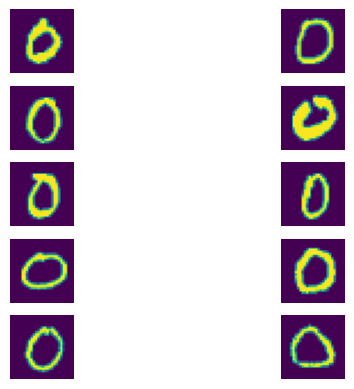

In [138]:
X0, y0 = get_by_label(testX, y, 0)
show_images(X0, 10)

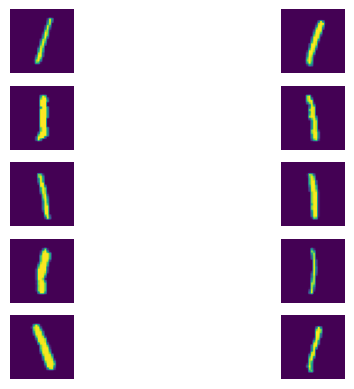

In [139]:
X1, y1 = get_by_label(testX, y, 1)
show_images(X1, 10)